#### Research Areas in Citizen Science

CS projects have been assigned into five broad categories using ESA:


*   Arts & Humanities

*   Life Sciences & Biomedicine

*   Physical Sciences

*   Social Sciences

*   Technology

Reference: https://images.webofknowledge.com/images/help/WOS/hp_research_areas_easca.html


In [35]:
# pandas and numpy for reading and manipulating the data
import pandas as pd
import numpy as np

# matplotlib and seaborn for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# read the dataset
dbRecords = pd.read_csv('query_result.csv')

In [36]:
# basic stats about the data
#dbRecords.info()

#### Q1:  What is the distribution of research areas at the project level? (considering the 5 main research areas)


In [37]:
#projects without research area assignments
dbRecords['Research Areas'].isnull().sum() 

100

In [38]:
#filter project title and researh area assignment for analysis
filter = dbRecords[['Title', 'Research Areas']]
df1 = filter.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 4948
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           4849 non-null   object
 1   Research Areas  4849 non-null   object
dtypes: object(2)
memory usage: 113.6+ KB


In [39]:
# only report the highest similarity RA assignment
newlist = []

for a in df1['Research Areas']:
  ra = a.split(",")[0] 
  strippedText = str(ra).replace('["',' ') 
  newlist.append(strippedText) 

In [40]:
df1['Extracted_RAs'] = np.array(newlist) 
df1.head()

,Title,Research Areas,Extracted_RAs
0,Virenmonitoring,"[""Life Sciences & Biomedicine, Virology, 0.9627043178755198""]",Life Sciences & Biomedicine
1,Deutsch in Österreich,"[""Social Sciences, Linguistics, 0.7164063577732533"" ""Life Sciences & Biomedicine, Audiology & Sp...",Social Sciences
2,Citree,"[""Physical Sciences, Sustainability Science, 0.37101916100160376"" ""Technology, Operations Resear...",Physical Sciences
3,Fossilfinder,"[""Technology, Remote Sensing, 0.40562888841322914"" ""Life Sciences & Biomedicine, Paleontology, 0...",Technology
4,Roadkill,"[""Life Sciences & Biomedicine, Veterinary Sciences, 0.6273242181218659"" ""Life Sciences & Biomedi...",Life Sciences & Biomedicine


In [41]:
# distribution of RAs across 4849 projects
df1['Extracted_RAs'].value_counts()

 Life Sciences & Biomedicine    2492
 Technology                      965
 Social Sciences                 671
 Physical Sciences               434
 Arts & Humanities               257
[]                                30
Name: Extracted_RAs, dtype: int64

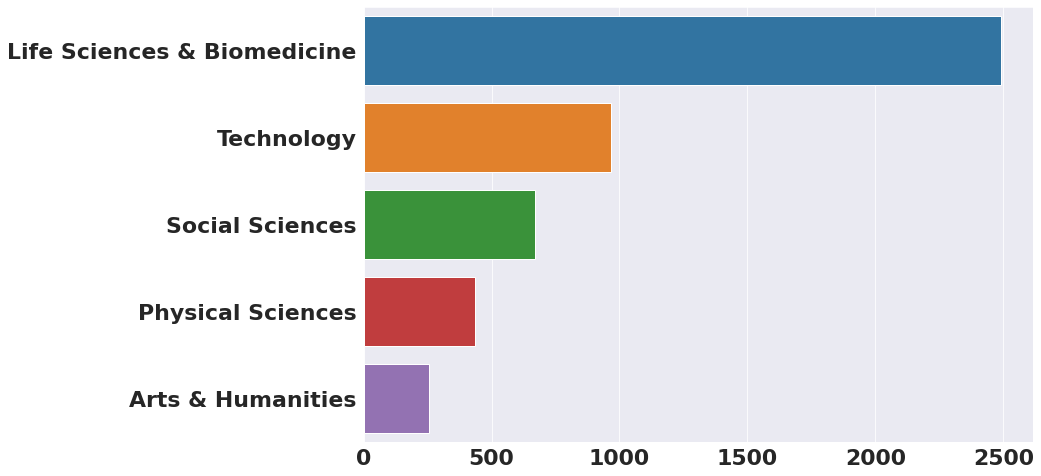

In [42]:
plt.rcParams["figure.figsize"] = [12, 8]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

sns.set_style('darkgrid')
x = ['Life Sciences & Biomedicine', 'Technology', 'Social Sciences', 'Physical Sciences', 'Arts & Humanities']
y = [2492, 965, 671, 434, 257]
save_plot = sns.barplot(y, x)
fig = save_plot.get_figure()
fig.savefig("assignment.png") 

#### Q2: In each research area what is the most common sub research area? 

In [43]:
df1.rename(columns = {'Research Areas':'Research_Areas'}, inplace = True)
df1 = df1[df1.Research_Areas != '[]']

In [44]:
#extract related sub research area
sublist = []
for a in df1['Research_Areas']:
  x = a.split(",")[1] 
  sublist.append(x) 

In [45]:
df1['Extracted_sub_area'] = np.array(sublist) 
df1.head()

,Title,Research_Areas,Extracted_RAs,Extracted_sub_area
0,Virenmonitoring,"[""Life Sciences & Biomedicine, Virology, 0.9627043178755198""]",Life Sciences & Biomedicine,Virology
1,Deutsch in Österreich,"[""Social Sciences, Linguistics, 0.7164063577732533"" ""Life Sciences & Biomedicine, Audiology & Sp...",Social Sciences,Linguistics
2,Citree,"[""Physical Sciences, Sustainability Science, 0.37101916100160376"" ""Technology, Operations Resear...",Physical Sciences,Sustainability Science
3,Fossilfinder,"[""Technology, Remote Sensing, 0.40562888841322914"" ""Life Sciences & Biomedicine, Paleontology, 0...",Technology,Remote Sensing
4,Roadkill,"[""Life Sciences & Biomedicine, Veterinary Sciences, 0.6273242181218659"" ""Life Sciences & Biomedi...",Life Sciences & Biomedicine,Veterinary Sciences


In [46]:
df2 = df1[['Extracted_RAs', 'Extracted_sub_area']]
df3 = df2.groupby(['Extracted_RAs','Extracted_sub_area'])['Extracted_sub_area'].count()
df3.to_frame()

Extracted_sub_area
Extracted_RAs      Extracted_sub_area                                    
 Arts & Humanities  Architecture                                        3
                    Art                                                10
                    Arts & Humanities Other Topics                      4
                    Asian Studies                                       1
                    Classics                                            1
...                                                                   ...
 Technology         Robotics                                            2
                    Science & Technology Other Topics                  23
                    Statistics & Probability                           12
                    Telecommunication                                  63
                    Transportation                                     34

[137 rows x 1 columns]

In [47]:
df3.to_csv('grouped.csv')

In [48]:
grouped_sub_ra = pd.read_csv('grouped.csv')
grouped_sub_ra.rename(columns={'Extracted_sub_area.1': 'count_sub_ra'}, inplace = True)

In [49]:
#top 3 sub research areas from main research area Life Sciences & Biomedicine
arts = grouped_sub_ra[(grouped_sub_ra['Extracted_RAs'].str.contains("Life Sciences & Biomedicine"))]
arts.nlargest(3, ['count_sub_ra'])

,Extracted_RAs,Extracted_sub_area,count_sub_ra
21,Life Sciences & Biomedicine,Biodiversity & Conservation,682
27,Life Sciences & Biomedicine,Environmental Sciences & Ecology,240
54,Life Sciences & Biomedicine,Ornithology,233


In [50]:
#top 3 sub research areas from main research area Technology
arts = grouped_sub_ra[(grouped_sub_ra['Extracted_RAs'].str.contains("Technology"))]
arts.nlargest(3, ['count_sub_ra'])

,Extracted_RAs,Extracted_sub_area,count_sub_ra
131,Technology,Remote Sensing,393
118,Technology,Construction & Building Technology,210
135,Technology,Telecommunication,63


In [51]:
#top 3 sub research areas from main research area Social Sciences
arts = grouped_sub_ra[(grouped_sub_ra['Extracted_RAs'].str.contains("Social Sciences"))]
arts.nlargest(3, ['count_sub_ra'])

,Extracted_RAs,Extracted_sub_area,count_sub_ra
100,Social Sciences,Education & Educational Research,121
91,Social Sciences,Archaeology,82
108,Social Sciences,Public Administration,62


In [52]:
#top 3 sub research areas from main research area Physical Sciences
arts = grouped_sub_ra[(grouped_sub_ra['Extracted_RAs'].str.contains("Physical Sciences"))]
arts.nlargest(3, ['count_sub_ra'])

,Extracted_RAs,Extracted_sub_area,count_sub_ra
90,Physical Sciences,Water Resources,165
74,Physical Sciences,Astronomy & Astrophysics,144
88,Physical Sciences,Sustainability Science,23


In [53]:
#top 3 sub research areas from main research area Arts & Humanities
arts = grouped_sub_ra[(grouped_sub_ra['Extracted_RAs'].str.contains("Arts & Humanities"))]
arts.nlargest(3, ['count_sub_ra'])

,Extracted_RAs,Extracted_sub_area,count_sub_ra
8,Arts & Humanities,History & Philosophy of Science,122
7,Arts & Humanities,History,52
9,Arts & Humanities,Literature,34


#### Q3: What is the distribution of research areas at the CS platform level?

In [54]:
#join original input data to obtain platform details
merged_data = df1.merge(dbRecords, left_on='Title', right_on='Title', suffixes=('_left', '_right')) 

#data relevant for analysis
platofrm_analysis = merged_data[['Wp2 ID', 'Title', 'Research Areas', 'Extracted_RAs', 'Extracted_sub_area']]
#platofrm_analysis.head() 

In [55]:
platofrm_analysis.rename(columns={'Wp2 ID': 'PlatformID'}, inplace = True)
platofrm_analysis.to_csv('platofrm_analysis.csv') 

In [57]:
#load processed data for platforms
platform_percentages = pd.read_csv('platofrm_analysis_ra.csv')

In [58]:
platform_percentages.rename(columns={'Title': 'Project_Titile'}, inplace = True)
#platform_percentages_count = platform_percentages.groupby(['PlatformID','Extracted_RAs'])['Extracted_RAs'].count()
#platform_percentages_count.to_csv('platform_percentages_count.csv')

Selected list of Platforms: Platform ID, Name

+ 13 - Zooniverse
+ 17 - EU citizen science
+ 1- Citizen Science Vlaanderen
+ 6 - Ciencia Ciudadana España
+ 10 - Schweiz forscht



In [61]:
# Research area assignment zooniverse 
zooniverse = platform_percentages[platform_percentages['PlatformID'] == 13] 
zooniverse['Extracted_RAs'].value_counts()


Life Sciences & Biomedicine    221
Technology                      71
Physical Sciences               47
Social Sciences                 15
Arts & Humanities               11
Name: Extracted_RAs, dtype: int64

In [60]:
# Research area assignment EU citizen science 
EU = platform_percentages[platform_percentages['PlatformID'] == 17] 
EU['Extracted_RAs'].value_counts()

Life Sciences & Biomedicine    90
Technology                     34
Social Sciences                24
Physical Sciences              12
Arts & Humanities              12
Name: Extracted_RAs, dtype: int64

In [62]:
# Research area assignment Vlaanderen
Vlaanderen = platform_percentages[platform_percentages['PlatformID'] == 1] 
Vlaanderen['Extracted_RAs'].value_counts()

Life Sciences & Biomedicine    10
Technology                      4
Social Sciences                 2
Physical Sciences               2
Arts & Humanities               1
Name: Extracted_RAs, dtype: int64

In [63]:
# Research area assignment Ciencia Ciudadana España
Ciencia = platform_percentages[platform_percentages['PlatformID'] == 6] 
Ciencia['Extracted_RAs'].value_counts()

Technology                     66
Social Sciences                46
Life Sciences & Biomedicine    44
Arts & Humanities              16
Physical Sciences              12
Name: Extracted_RAs, dtype: int64

In [64]:
# Research area assignment Schweiz forscht
Schweiz = platform_percentages[platform_percentages['PlatformID'] == 10] 
Schweiz['Extracted_RAs'].value_counts()

Life Sciences & Biomedicine    32
Technology                     21
Social Sciences                 9
Arts & Humanities               2
Physical Sciences               2
Name: Extracted_RAs, dtype: int64